# Linear and polynomial regression

This notebook covers linear and polynomial regression on a simple dataset.

## Linear Regression

Linear regressions is useful for making predictions. It outputs the weighted sum of inputs, represented as $y = X\beta$. It can also be written as $\hat{y} = W^TX + b$

Where:
- $W$ or $\beta$ is the weights, a column vector with 1 weight per input value
- $X$ is the input values for a single observation
- $b$ is the bias ($y$ intercept), which will be set as the first weight value in the $w$ vector
- $y$ is the value returned by the function ($\hat{y}$ is a prediction)

The equation forms a line (the same as $y=mx+b$) and allows predicting values after the weights $W$ and bias $b$ are estimated. We'll simplify the equation to $\hat{y} = X\beta$ by modifying the input matrix $X$, inserting a 1 before the first value and instead of adding $b$ we'll make the first value of $w$ take the place of $b$. This first value, $w_0$ does the same thing adding an extra weight at the end because $w_0 = w_0*1$ which is all $b$ does.

It would look like this:

$X$ was this:

$X = 
\begin{bmatrix}
x_1 \\ 
x_2 \\
\vdots \\ 
x_m \\
\end{bmatrix}
$

$X$ is now this:

$X = 
\begin{bmatrix}
1 \\
x_1 \\ 
x_2 \\
\vdots \\ 
x_m \\
\end{bmatrix}
$


### Estimating the weights and bias

There is more than one way to estimate the weights.

#### If X is a square matrix

We can write the equation as $y=wX$ and notice that if $X$ is a square matrix we can solve this by multiplying both sides by the inverse of $X$ getting $X^{-1}y=w$.

#### If X is not a square matrix

Many times the data $X$ will be a matrix with non square dimensions. I've added the dimension below each variable as $y_{n x 1}=X_{n x m}w_{m x 1}$. Assuming $n << m$ ($n$ is much less than $m$, or we have many more variables than observations), we can take the left pseudo inverse of $X$ to solve for $w$. 

The simplest method, which can be found in many tutorials makes use of the fact that we want $w$ such that $e$ is orthogonal to the span of $X$. This is because two orthogonal vectors have an inner product of 0, which would mean our error is equal to 0 and minimized. To solve this the error is usually written as $e = Xw - y = 0$. This makes sense because if $Xw$ perfectly predicts $y$ then subtracting one from the other will return $0$. To check that $e$ is orthogonal to $X$ we write $(Xw-y)^TX=0$ which we can solve as follows:

- $(Xw-y)^TX=0$
- $X^T(Xw-y)=0$
- Expand the equation
- $X^TXw-X^Ty=0$
- $X^TXw=X^Ty$
- Now multiply both sides by the inverse of $X^TX$ to solve for $w$
- $w=(X^TX)^{-1}X^Ty$

### A longer method

We can arrive at the same solution using a slightly longer method but one that can be useful to help understand what is taking place. 

We can start by defining what we want to accomplish, which is to minimize the error of our function, so lets define that. We can measure the error by using the squared L2 norm of our equation. We want our equation to be equal to $0$, so $y=Xw$ becomes $wx-w=0$. Our error is now $E=\frac{1}{2}\lvert\lvert Xw-y \rvert\rvert_2^2. The $\frac{1}{2}$ is used for convenience and not necessary, it simply clears the exponent from the equation when we take the derivative later.

With the error defined we'll break it down as follows:
- $E=\frac{1}{2}\lvert\lvert Xw-y \rvert\rvert_2^2$
- $= \frac{1}{2}(Xw-y)^T(Xw-y)$
- Note $(AB)^T=B^TA^T$
- $\frac{1}{2}(Xw-y)^T(Xw-y)$
- $=\frac{1}{2}(w^TX^T-y^T)(Xw-y)$
- $=\frac{1}{2}(w^TX^TXw - w^TX^Ty - y^TXw + y^Ty)$
- Note $w^TX^Ty$ can be rewriten as $y^TXw$ and we can simplify the equation a little more
- $=\frac{1}{2}(w^TX^TXw - 2y^TXw + y^Ty)$

Now we want to minimize over $w$, so we have $min_w \frac{1}{2}(w^TX^TXw - 2y^TXw + y^Ty) = f(x)$

Our minimization of $f(w)$ will return a vector of values looking like this:

$\Delta_w f = 
\begin{bmatrix}
\frac{\partial f}{\partial w_1} \\ 
\frac{\partial f}{\partial w_2} \\
\vdots \\ 
\frac{\partial f}{\partial w_m} \\
\end{bmatrix}
$

Taking the partial derivative of $f$ with respect to $X$ we get:
- $\Delta_x f = X^TXw - y^TX + 0$
- $X^TXw = y^TX$
- Before multiplying by the identity of $X^TX$ to solve for $w$ we can rewrite the right hand side as $y^TX=X^Ty$
- $X^TXw = X^Ty$
- $w = (X^TX)^{-1}X^Ty$

This the same result we got from above.

## Polynomial regression

Sometimes a straight line is not sufficient to predict data, and a curved line works better. Polynomial regression can help us achieve this.

Example of polynomial regression:
- $y = ax^2 + bx + c$

Where:
- $y$ is the output
- $a$ is the first weight ($\beta$ value)
- $b$ is the second weight ($\beta$ value)
- $c$ is the third weight ($\beta$ value)
- $x$ is the input value
    - Note that $x$ is the same value in the first and second terms here, its squared when multiplied by $a$ and then again the same value is multiplied by $b$
    
The weights are estimated using the same steps as above.

### Algorithmic complexity

Using ordinary least squares to solve linear regression the time complexity is $O(n^2)$. The matrix inversion steps contribute to this. Using other methods, such as gradient descent the time complexity can be $O(kn)$.

Where:
- $k$ is the number of features in the dataset
- $n$ is the number of observations in the dataset

Using ordinary least squares to solve polynomial regression the time complexity is $O(kn)$.

Where:
- $k$ is the degree of polynomial
- $n$ is the number of observations in the dataset

Although it may appear that polynomial regression is less expensive than linear regression when using OLS to solve, the degree of polynomial plays a big role and can make the linear time complexity of polynomial regression greater than the quadratic time complexity of linear regression.

## Code example

*A system has generated outputs marked by vector ‘d’ in response to inputs which are listed in vector ‘x’:*

d = [6.0532, 7.3837, 10.0891, 11.0829, 13.2337, 12.6710, 12.7772, 11.6371 ]

x = [1 , 1.7143, 2.4286 , 3.1429, 3.8571, 4.5714, 5.2857, 6 ]

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

np.random.seed(0)

In [2]:
d = [6.0532, 7.3837, 10.0891, 11.0829, 13.2337, 12.6710, 12.7772, 11.6371]
x = [1 , 1.7143, 2.4286 , 3.1429, 3.8571, 4.5714, 5.2857, 6]

In [3]:
class LinearReg:
    def __init__(self, x, y, **kwargs):
        self.poly = kwargs.get("poly", False)
        self.x = self.fix_x(x)
        self.y = y
        self.w = self.init_weights()

        
    def fix_x(self, x):
        """inserts intercept term and makes polynomial transformation if required
        params:
            x: inputs
        """
        
        x = np.array(x).reshape(-1,1)
        x = np.insert(x, 1, 1, axis = 1)
        if not self.poly:
            return  x
        else:
            for i in range(2, self.poly+1):
                x = np.insert(x, 0, x[:,-2]**i, axis = 1)
            return x

    
    def init_weights(self):
        """solves for regressions coeficients
        w = (xTx)^-1 xTy
        """
        
        return np.linalg.pinv(self.x.T@self.x)@self.x.T@self.y


    def forward(self):
        """returns inner product of initially supplied inputs and regression coeficients"""
        
        return np.dot(self.x, self.w)


    def e(self, y, y_hat):
        """calculates mean squared error
        params:
            y: desired output
            y_hat: predictd output
        """
        return np.sum(np.square(y - y_hat)) / (2 * np.array(y).shape[0])


    def predict(self, x):
        """uses model to predict outputs of new inputs
        params:
            x: new inputs
        """
        
        x = self.fix_x(x)
        return np.dot(x, self.w)


    def plot_results(self, x = None, y = None):
        """plots data points and line produced by model
        params:
            x: optional, new inputs
            y: optional, new desired outputs
        """

        if x is None:
            x = self.x
            y = self.y
        else:
            x = self.fix_x(x)
            y = y

        plt.scatter(x = x[:,-2], y = y)

        linex = self.fix_x(np.array(np.linspace(np.min(x[:,-2]),np.max(x[:,-2]),100).reshape(-1,1)))
        liney = np.array([x.T@self.w for x in linex])
        plt.plot(linex[:,-2], liney)

        if not self.poly:
            plt.title("Regression plot")
        else:
            plt.title(f"Regression plot {self.poly} order polynomial")
        plt.xlabel("Inputs (X)")
        plt.ylabel("Outputs (Y)")

## Linear model

Lets fit a linear model to the data and see how it performs

Cost of model in 1a: 0.888


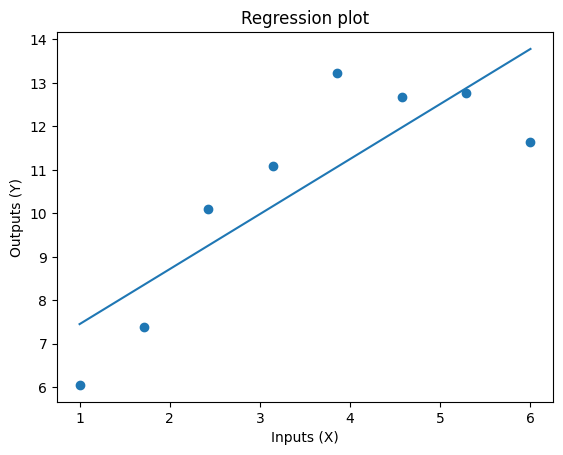

In [4]:
lr = LinearReg(x,d)
lr.plot_results()
print(f"Cost of model in 1a: {lr.e(d, lr.predict(x)):.3f}")

## Second order polynomial model


Cost of model in 1b: 0.106


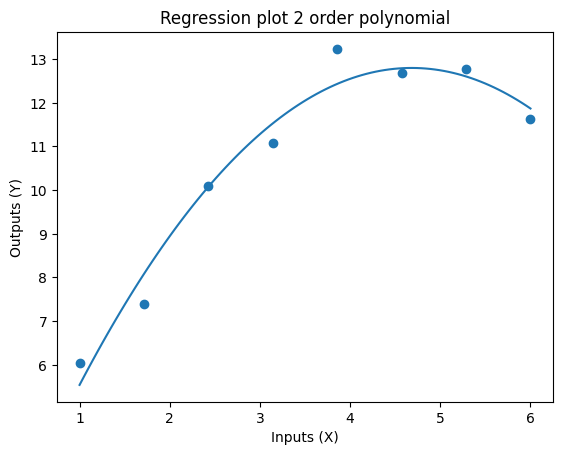

In [5]:
lr = LinearReg(x,d, poly = 2)
lr.plot_results()
print(f"Cost of model in 1b: {lr.e(d, lr.predict(x)):.3f}")

## 6th order polynomial

Cost of model in 1c: 0.052


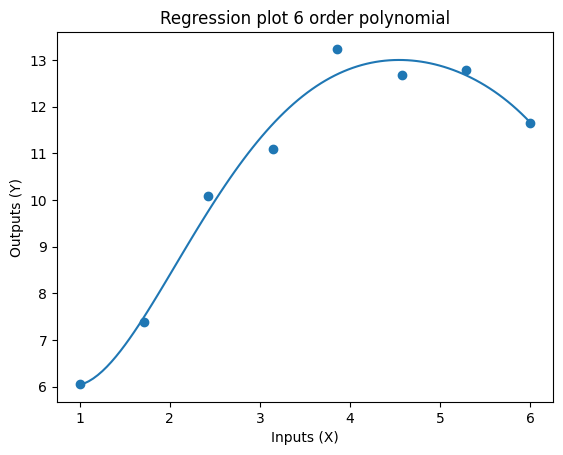

In [6]:
lr = LinearReg(x,d, poly = 6)
lr.plot_results()
print(f"Cost of model in 1c: {lr.e(d, lr.predict(x)):.3f}")

## How adaptable is the model?

All models should be able to adapt well to new data, and overfitting can hamper this. We'll remove a single data point and again fit a 6th order polynomial model. Then we'll add the point back in and see how the model performs with this new data.

Cost of model in 1d with point removed: 3.615


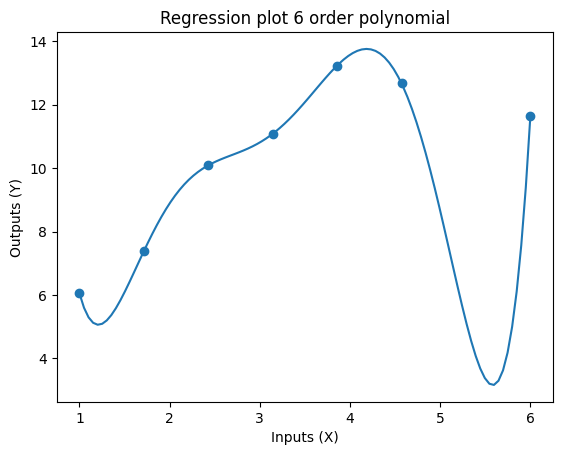

In [10]:
d_ = [6.0532, 7.3837, 10.0891, 11.0829, 13.2337, 12.6710, 11.6371]
x_ = [1 , 1.7143, 2.4286 , 3.1429, 3.8571, 4.5714, 6]

lr = LinearReg(x_,d_, poly = 6)
lr.plot_results()
print(f"Cost of model in 1d with point removed: {lr.e(d, lr.predict(x)):.3f}")

The error reduces from 0.052 (6th order polynomial with all points) to 0.000 (6th order polynomial with 1 point removed). However, we can see the line our model produced has changed quite a bit between the two models, specifically where the point was removed. The model has been overfit and will have a drastic change in MSE if the point is added back in.

Cost of model in 1d with point added back in: 3.615


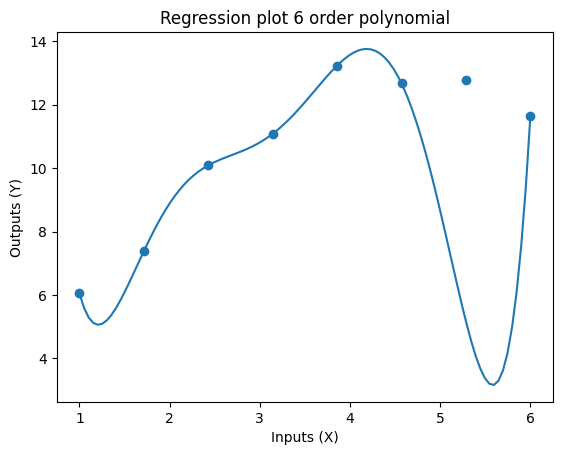

In [11]:
d = [6.0532, 7.3837, 10.0891, 11.0829, 13.2337, 12.6710, 12.7772, 11.6371]
x = [1 , 1.7143, 2.4286 , 3.1429, 3.8571, 4.5714, 5.2857, 6]

lr.plot_results(x,d)
print(f"Cost of model in 1d with point added back in: {lr.e(d, lr.predict(x)):.3f}")

In this plot we can see the over fitting and resulting issues when the point is added back to the model. The new data point is completely missed by the high order polynomial curve. The model does not generalize well and the error shows a significant increase.

## MSE of various models

Below is a plot of MSE by model complexity. We could use this to help us visualize where a good degree of polynomial would be for the model

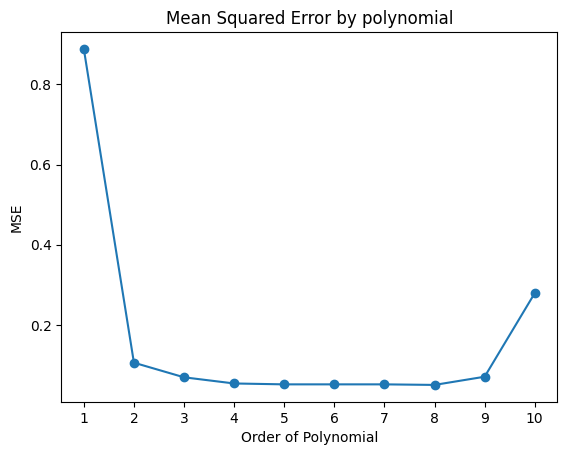

In [12]:
e_lst = []
for i in range(1,11):
    lr = LinearReg(x,d, poly = i)
    e_lst.append(lr.e(d, lr.predict(x)))

plt.scatter(x = [x for x in range(10)], y = e_lst)
plt.plot(e_lst)
plt.xticks([x for x in range(10)],[x for x in range(1,11)])
plt.title("Mean Squared Error by polynomial")
plt.xlabel("Order of Polynomial")
plt.ylabel("MSE")
plt.show()

In [13]:
sorted([(i,x) for i,x in zip(list(range(1,11)), e_lst)], key = lambda x: x[1])

[(8, 0.05020455927335244),
 (6, 0.0516026159485795),
 (5, 0.05160748609818458),
 (7, 0.0516100291440212),
 (4, 0.05382767880943158),
 (3, 0.06920297587008596),
 (9, 0.07065223307026298),
 (2, 0.10564376967223202),
 (10, 0.2790943762798458),
 (1, 0.8884117545713557)]

From the plot we can see the mean squared error of the model decreases as the order of polynomial increases until the 8th order (also confirmed on the sorted list above), where it begins to increase. Choosing the best polynomial for the task at hand requires some careful thought, as the model with the lowest error will likely be overfit and not generalize well. Because this dataset is small and easy to visualize we can see that a lower order, say 2 or 3 would likely fit well enough, and leave room for generalizing to new data in the future. Below I plot the 3rd order polynomial and suggest this may be the optimal solution.

Cost of model using my suggested 3rd order polynomial: 0.069


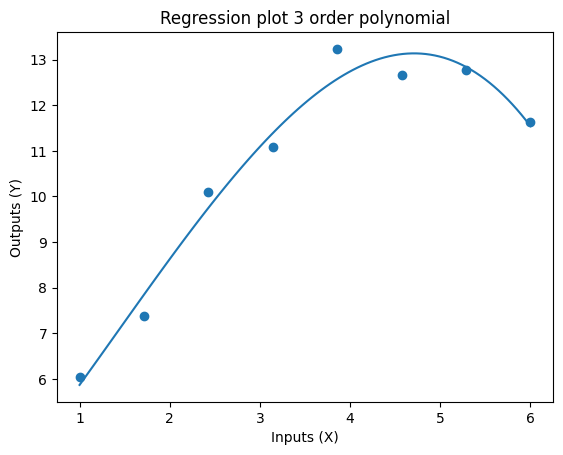

In [14]:
lr = LinearReg(x,d, poly = 3)
lr.plot_results()
print(f"Cost of model using my suggested 3rd order polynomial: {lr.e(d, lr.predict(x)):.3f}")